## __Graph Applications__

Board games often have expansions, implementations ("re-skinned" mechanics), and a variety of other connections.  This notebook contains my efforts to diagram those relationships.  

At the moment, it's incomplete (and will remain a side project for the time being).  

In [ ]:
#Add bgg data import here
#************************



In [6]:
bgg_df_temp = bgg_df.reset_index().rename(columns={'index':'game_id'})

In [220]:
bgg_df_temp = bgg_df_temp.explode('expansion_ids')
bgg_df_temp = bgg_df_temp.explode('expands')
# bgg_df_expansion_ids = bgg_df_temp[bgg_df_temp['expansion_ids'].notnull()]
# bgg_df_expands = bgg_df_temp[bgg_df_temp['expands'].notnull()]

In [250]:
import networkx as nx
G = nx.from_pandas_edgelist(bgg_df_temp[:300],
                            source = 'game_id',
                            target=['expansion_ids', 'expands'],
                            edge_attr=['rating_average', 'categories'],
                            create_using=nx.MultiDiGraph())

In [225]:
G.edges(data=True)

MultiEdgeDataView([(302809, nan, {'rating_average': 7.23633, 'categories': ['Adventure', 'Exploration', 'Miniatures']}), (nan, 283619, {'rating_average': 7.70797, 'categories': ['Fantasy']}), (nan, 294484, {'rating_average': 8.74445, 'categories': ['Book', 'Card Game', 'Fantasy', 'Fighting', 'Miniatures', 'Novel-based']}), (nan, 293889, {'rating_average': 7.40626, 'categories': ['Video Game Theme']}), (nan, 301919, {'rating_average': 7.23093, 'categories': ['Medical']}), (nan, 272638, {'rating_average': 8.71567, 'categories': ['Animals', 'Expansion for Base-game', 'Wargame']}), (nan, 299597, {'rating_average': 8.83869, 'categories': ['Expansion for Base-game', 'Adventure', 'Fantasy', 'Fighting', 'Novel-based']}), (nan, 276337, {'rating_average': 7.95294, 'categories': ['Napoleonic', 'Wargame']}), (nan, 206480, {'rating_average': 8.55475, 'categories': ['Age of Reason', 'Wargame']}), (nan, 298190, {'rating_average': 0.0, 'categories': ['Sports']}), (nan, 300401, {'rating_average': 7.5, 

True

In [249]:
G.clear()

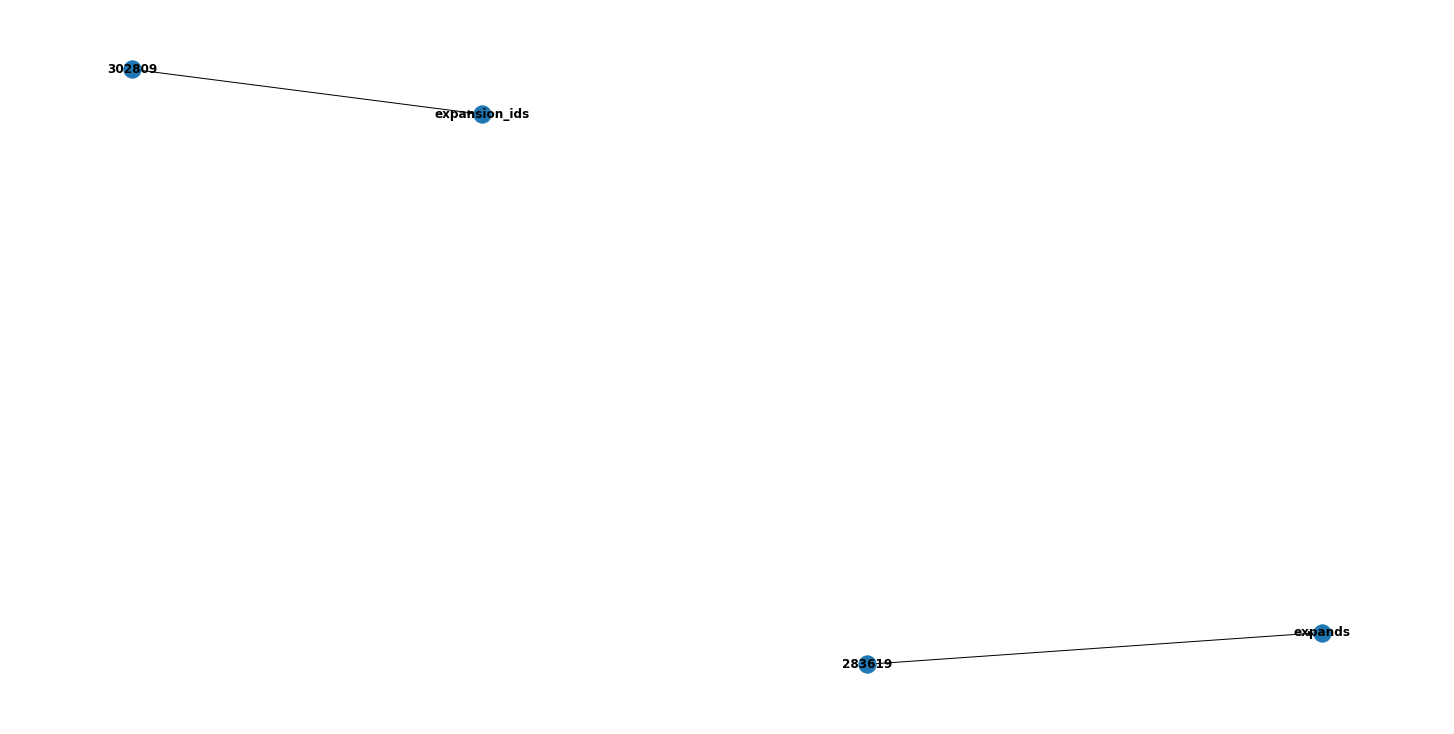

In [251]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

nx.draw(G, with_labels=True)
plt.show()

In [ ]:
from bokeh.io import output_file, show
from bokeh.plotting import figure, from_networkx

plot = figure(title="Games Data", x_range=(-1.1,1.1), y_range=(-1.1,1.1))# tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

# output_file("networkx_graph.html")
show(plot)